1. Представити початковi данi графiчно.
2. Побудувати модель кластеризацiї згiдно з варiантом.
3. Виконати кластеризацiю даних на основi моделi.
4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.
5. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних домiльйона).
6. Побудувати кiлька альтернативних моделей:
• шляхом змiни значень параметрiв основної моделi,
• використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зро-
бити,
• задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть
кластерiв - параметр.

7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics (тiльки метрики згiдно з варiантом): Алгоритм DBSCAN.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

n_samples_1 = 1000
n_samples_2 = 700
centers = [[0.0, 0.0], [-3.5, -3.5]]
clusters_std = [2.0, 1.0]
X, y = make_blobs  (n_samples=[n_samples_1, n_samples_2], centers=centers, 
                    cluster_std = clusters_std, random_state =0, shuffle = False)
 

<AxesSubplot:>

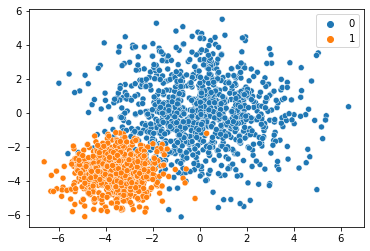

In [6]:
#отримні дані графічно 
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = y)

In [7]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

cluster = DBSCAN(eps=0.8, min_samples = 26)

In [8]:
def scoring (data, y, X):
    print(f"Estimated number of clusters: {len(np.unique(data.labels_))}")
    print(f"Estimated number of noise points: {list(data.labels_).count(-1)}")
    print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, data.labels_)}")
    print(f"Silhouette Coefficient: {metrics.silhouette_score(X, data.labels_)}")
    print(f"Calinski Harabasz score: {metrics.calinski_harabasz_score(X, data.labels_)}")

In [9]:
cluster.fit(X)

DBSCAN(eps=1, min_samples=25)

<AxesSubplot:>

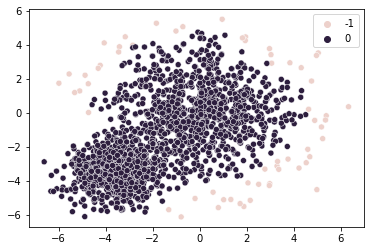

In [10]:
#перше розбиття 
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = cluster.labels_)

In [11]:
scoring (cluster, y, X)

Estimated number of clusters: 2
Estimated number of noise points: 60
Adjusted Mutual Information: 0.03872776715152622
Silhouette Coefficient: 0.34501106494303396
Calinski Harabasz score: 49.25392750841176


In [12]:
#альтернативна модель 
cluster = DBSCAN(eps=0.5, min_samples = 15).fit(X)

In [13]:
scoring (cluster, y, X)

Estimated number of clusters: 2
Estimated number of noise points: 86
Adjusted Mutual Information: 0.055723926016582326
Silhouette Coefficient: 0.32632021032782993
Calinski Harabasz score: 68.35891279122572


<AxesSubplot:>

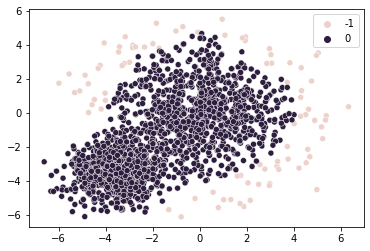

In [14]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = cluster.labels_)

In [15]:
#альтернативна модель 
db = DBSCAN(eps=1, min_samples = 15).fit(X)

In [16]:
scoring (db, y, X)

Estimated number of clusters: 2
Estimated number of noise points: 41
Adjusted Mutual Information: 0.032148527710279054
Silhouette Coefficient: 0.3639551697918378
Calinski Harabasz score: 41.67384012046224


<AxesSubplot:>

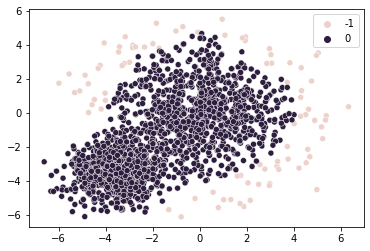

In [17]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = cluster.labels_)

Зміна порядку


In [18]:
from sklearn.utils import shuffle

X, y = shuffle(X, y)

In [19]:
clustering = DBSCAN(eps=0.7, min_samples = 17)

In [20]:
clustering.fit(X)

DBSCAN(eps=0.8, min_samples=8)

<AxesSubplot:>

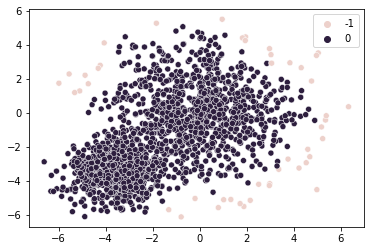

In [21]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = clustering.labels_)

In [22]:
scoring(clustering, y, X)

Estimated number of clusters: 2
Estimated number of noise points: 46
Adjusted Mutual Information: 0.029134449397953673
Silhouette Coefficient: 0.353857199499606
Calinski Harabasz score: 42.13274846172382


In [23]:
clustering_1 = DBSCAN(eps=1, min_samples = 21)

In [24]:
clustering_1.fit(X)

DBSCAN(eps=1, min_samples=10)

<AxesSubplot:>

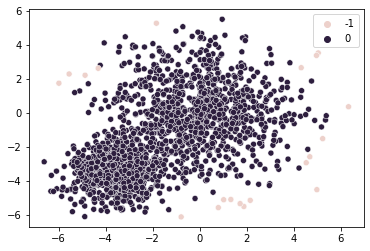

In [25]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = clustering_1.labels_)

Інший алгоритм

In [26]:
scoring(clustering_1, y, X)

Estimated number of clusters: 2
Estimated number of noise points: 20
Adjusted Mutual Information: 0.016168354926220093
Silhouette Coefficient: 0.36528732862168994
Calinski Harabasz score: 14.171608323002006


In [27]:
#MeanSHIFT
from sklearn.cluster import MeanShift
clustering = MeanShift(n_jobs = -1)

In [29]:
clustering.fit(X)

MeanShift(n_jobs=-1)

<AxesSubplot:>

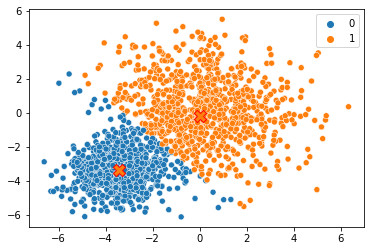

In [30]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec = 'blue', marker = 'X')

In [31]:
scoring(clustering, y, X)

Estimated number of clusters: 2
Estimated number of noise points: 0
Adjusted Mutual Information: 0.6822226896159779
Silhouette Coefficient: 0.5123634624014167
Calinski Harabasz score: 2422.906302100003


Висновки:

Метод DBSCAN не справляється з даним набором даних, адже підібрати правильні параметри щоб кластери формувалися правильно неможливо. Навіть після змни об'єктів нічого не змінилося. Однак метод MeanShift підійшов до даних і показав гарні результати.